# Health Insurance Fraud detection
#### Analysed by : Osafa Karim (osafa.karim@capgemini.com)
#### Data Scource : https://www.kaggle.com/rohitrox/healthcare-provider-fraud-detection-analysis#Test-1542969243754.csv


In [21]:
# import the required libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import time
pd.set_option('display.max_columns', 999)

##### loading the data sets in pandas data-frame

In [2]:
os.listdir()

['Train_Inpatientdata-1542865627584.csv',
 'Train_Outpatientdata-1542865627584.csv',
 'Test_Inpatientdata-1542969243754.csv',
 'Test_Beneficiarydata-1542969243754.csv',
 'Train-1542865627584.csv',
 'Train_Beneficiarydata-1542865627584.csv',
 'Test_Outpatientdata-1542969243754.csv',
 '.ipynb_checkpoints',
 '.git',
 'Health Insurance Fraud Detection.ipynb',
 'Test-1542969243754.csv']

In [3]:
df = {}
for a in os.listdir():
    if a[:5]  == 'Train':
        star_t = time.time()
        #df_name = 'df_'.join(a)
        df[a[:9]] = pd.read_csv(a) 
        end_t = time.time()
        print('File Name : ',a,
              '\n File size : ',os.path.getsize(a),
              '\n Time taken to load : ',end_t - star_t,
              '\n Loaded successfully !')

File Name :  Train_Inpatientdata-1542865627584.csv 
 File size :  8572555 
 Time taken to load :  0.2895209789276123 
 Loaded successfully !
File Name :  Train_Outpatientdata-1542865627584.csv 
 File size :  77391090 
 Time taken to load :  2.1390268802642822 
 Loaded successfully !
File Name :  Train-1542865627584.csv 
 File size :  87094 
 Time taken to load :  0.01536417007446289 
 Loaded successfully !
File Name :  Train_Beneficiarydata-1542865627584.csv 
 File size :  11444821 
 Time taken to load :  0.3743917942047119 
 Loaded successfully !


In [4]:
df.keys()

dict_keys(['Train_Inp', 'Train_Out', 'Train-154', 'Train_Ben'])

In [5]:
type(df['Train_Inp'])

pandas.core.frame.DataFrame

In [6]:
df_train_inp = df['Train_Inp']

In [7]:
df_train_out = df['Train_Out']

In [8]:
df_train_label = df['Train-154'] 

In [9]:
df_train_ben = df['Train_Ben']

##### Let's view the stats for the train data sets

In [10]:
# deleting 
del(df)
del(df_name)

NameError: name 'df_name' is not defined

###### Visualize and describe the BENEFICIARY data

In [ ]:
df_train_ben.describe()

In [ ]:
df_train_ben.info()

###### check for the nulls/missing values

In [ ]:
len(df_train_ben[df_train_ben.isna().any(axis=1)])

###### check for the columns having missing values

In [ ]:

for a in df_train_ben.columns[df_train_ben.isna().any()].tolist():
    print(a,' has ',df_train_ben[a].isna().sum())

In [ ]:
df_train_ben.head()

In [26]:
len(df_train_ben), len(df_train_ben['BeneID']) , len(df_train_ben['BeneID'].unique())

(138556, 138556, 138556)

###### So we have 138,556 beneficiers for analysis

In [ ]:
#df_train_ben['Gender'].plot(kind='bar')

In [27]:
df_train_ben['Gender'].value_counts()

2    79106
1    59450
Name: Gender, dtype: int64

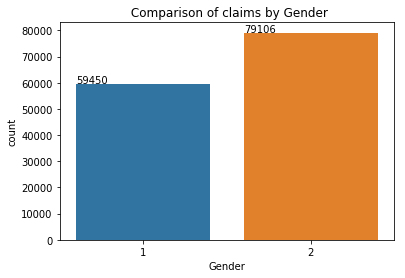

In [28]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Gender', data=df_train_ben)
plt.title(' Comparison of claims by Gender')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [29]:
df_train_ben['Race'].unique()

array([1, 2, 3, 5])

In [30]:
df_train_ben['Race'].value_counts()

1    117057
2     13538
3      5059
5      2902
Name: Race, dtype: int64

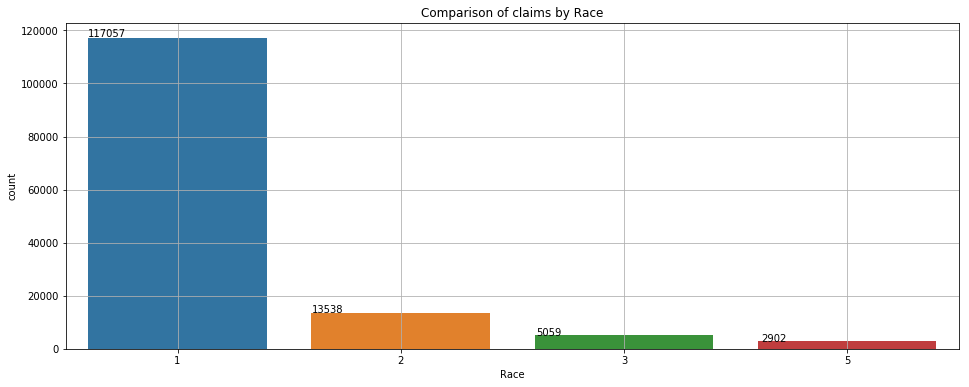

In [31]:
plt.figure(figsize=(16,6))
ax = sns.countplot(x = "Race", data=df_train_ben)
plt.title('Comparison of claims by Race')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.grid(True)


In [32]:
df = df_train_ben[['Race','Gender']].groupby(['Race','Gender']).count()

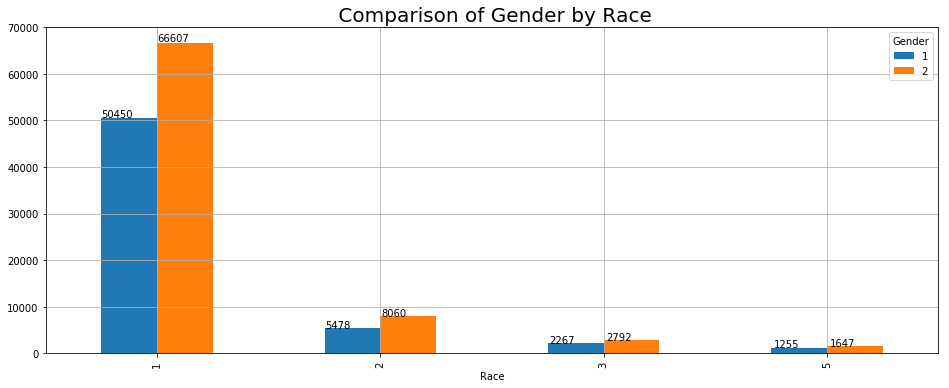

In [33]:
ax = pd.crosstab(df_train_ben['Race'],df_train_ben['Gender']).plot(kind = 'bar',figsize=(16,6))
plt.grid(True)
plt.title(" Comparison of Gender by Race",fontsize = 20)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

###### Visualize and describe the IN-Patient data

In [34]:
df_train_inp.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,40474.000000,39575.0,23148.000000,5454.000000,965.000000,116.000000,9.000000,0.0
mean,10087.884074,1068.0,5894.611759,4103.738174,4226.355440,4070.172414,5269.444444,NaN
std,10303.099402,0.0,3049.304400,2028.182156,2282.761581,1994.409802,2780.071632,NaN
min,0.000000,1068.0,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN
25%,4000.000000,1068.0,3848.000000,2724.000000,2724.000000,2758.750000,4139.000000,NaN
50%,7000.000000,1068.0,5369.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN
75%,12000.000000,1068.0,8666.250000,4439.000000,5185.000000,4439.000000,5185.000000,NaN
max,125000.000000,1068.0,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN


In [35]:
df_train_inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
BeneID                    40474 non-null object
ClaimID                   40474 non-null object
ClaimStartDt              40474 non-null object
ClaimEndDt                40474 non-null object
Provider                  40474 non-null object
InscClaimAmtReimbursed    40474 non-null int64
AttendingPhysician        40362 non-null object
OperatingPhysician        23830 non-null object
OtherPhysician            4690 non-null object
AdmissionDt               40474 non-null object
ClmAdmitDiagnosisCode     40474 non-null object
DeductibleAmtPaid         39575 non-null float64
DischargeDt               40474 non-null object
DiagnosisGroupCode        40474 non-null object
ClmDiagnosisCode_1        40474 non-null object
ClmDiagnosisCode_2        40248 non-null object
ClmDiagnosisCode_3        39798 non-null object
ClmDiagnosisCode_4        38940 non-null object
ClmDiagnosisCode_5        37

In [36]:
in_missing_df = {}
for a in df_train_inp.columns[df_train_inp.isna().any()].tolist():
    #print(a,' has ',df_train_inp[a].isna().sum())
    in_missing_df[a] = df_train_inp[a].isna().sum()
    
in_missing_df = pd.DataFrame.from_dict(in_missing_df, orient = 'index', columns=['Count of missing values'])

In [37]:
in_missing_df

,Count of missing values
AttendingPhysician,112
OperatingPhysician,16644
OtherPhysician,35784
DeductibleAmtPaid,899
ClmDiagnosisCode_2,226
ClmDiagnosisCode_3,676
ClmDiagnosisCode_4,1534
ClmDiagnosisCode_5,2894
ClmDiagnosisCode_6,4838
ClmDiagnosisCode_7,7258


##### So from the above analysis it is imperative that we have to impute the data/fill in the missing values so that the information is not missed , analyses is not skewd and is statistically valid.

In [38]:
df_train_inp.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [39]:
len(df_train_inp['BeneID'].unique())

31289

In [40]:
# let's see how many of the benficiaries have multiple claims
df_bene_id = df_train_inp['BeneID'].value_counts()

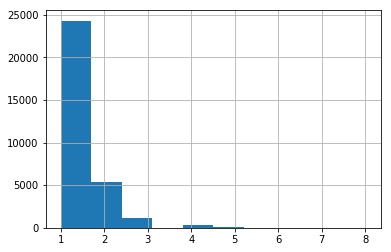

In [41]:
df_bene_id.hist()

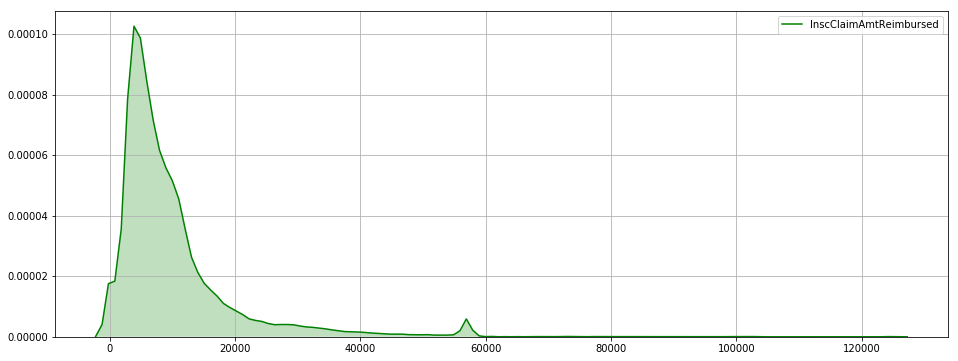

In [42]:
# Let's visualize InscClaimAmtReimbursed
plt.figure(figsize=(16,6))
sns.kdeplot(df_train_inp['InscClaimAmtReimbursed'], shade=True, color = 'g')
plt.grid(True)

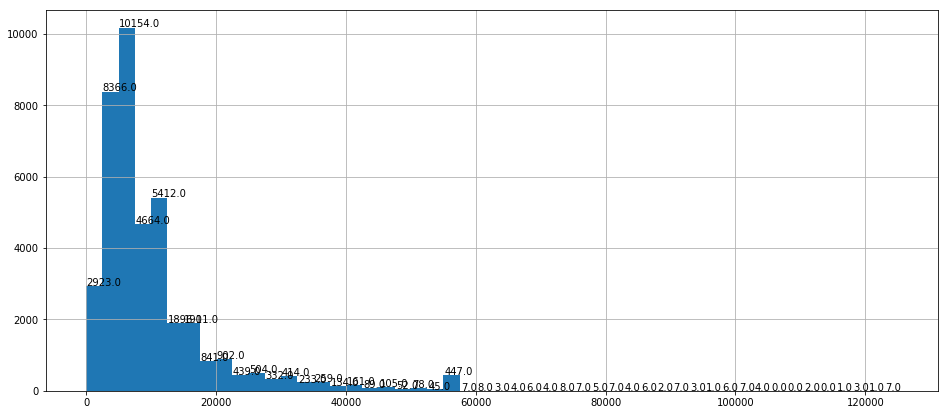

In [43]:
plt.figure(figsize=(16,7))
ax = df_train_inp['InscClaimAmtReimbursed'].hist(bins=50)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [44]:
# Provider
len(df_train_inp['Provider'].unique())

2092

In [47]:
df_provider_50 = pd.DataFrame(df_train_inp['Provider'].value_counts().head(50))

In [48]:
df_provider_50.T

,PRV52019,PRV55462,PRV54367,PRV53706,PRV55209,PRV56560,PRV54742,PRV55230,PRV52340,PRV51501,PRV56416,PRV52135,PRV54955,PRV51244,PRV51560,PRV54765,PRV53808,PRV51940,PRV57191,PRV52021,PRV52846,PRV52821,PRV55194,PRV52903,PRV52120,PRV52100,PRV51390,PRV52123,PRV51146,PRV51145,PRV51471,PRV53712,PRV55019,PRV54986,PRV51614,PRV52574,PRV53692,PRV52642,PRV55215,PRV51948,PRV54894,PRV52178,PRV53769,PRV54936,PRV53401,PRV55435,PRV55849,PRV51578,PRV56647,PRV52985
Provider,516,386,322,282,275,248,231,225,224,223,214,210,205,200,200,196,195,193,185,181,175,173,169,167,165,164,164,162,162,161,161,161,158,153,148,146,146,146,143,143,138,133,132,131,130,128,128,122,121,121


Text(0.5, 0, 'Insurance Providers ')

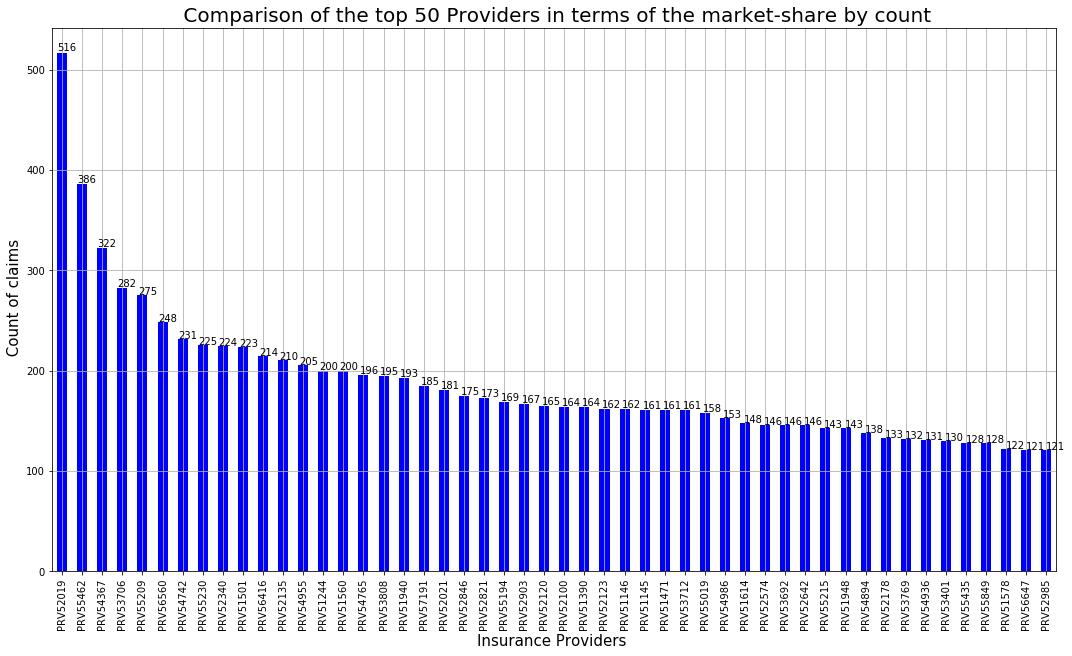

In [49]:
# let's plot top 50 providers
df_provider = (df_train_inp['Provider'].value_counts().head(50))
ax = df_provider.T.plot(kind='bar', figsize = (18, 10) , grid = True ,colormap='bwr')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title(" Comparison of the top 50 Providers in terms of the market-share by count",fontsize=20 )
plt.ylabel(' Count of claims', fontsize = 15)
plt.xlabel('Insurance Providers ', fontsize = 15)

In [50]:
# AttendingPhysician
len(df_train_inp['AttendingPhysician'].unique())

11605

In [51]:
df_attending_physician = df_train_inp['AttendingPhysician'].value_counts().head(50)

Text(0.5, 0, 'Physician ')

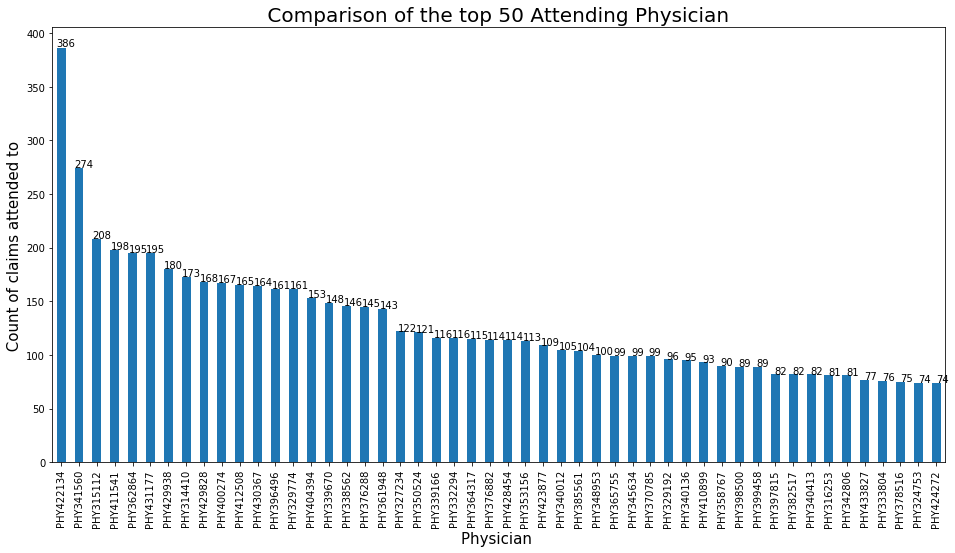

In [52]:
ax = df_attending_physician.T.plot(kind = 'bar' , figsize=(16,8))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title(" Comparison of the top 50 Attending Physician ",fontsize=20 )
plt.ylabel(' Count of claims attended to ', fontsize = 15)
plt.xlabel('Physician ', fontsize = 15)

###### Visualize and describe the Out-Patient data

In [53]:
df_train_out.shape

(517737, 27)

In [54]:
df_train_out.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [55]:
df_train_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
BeneID                    517737 non-null object
ClaimID                   517737 non-null object
ClaimStartDt              517737 non-null object
ClaimEndDt                517737 non-null object
Provider                  517737 non-null object
InscClaimAmtReimbursed    517737 non-null int64
AttendingPhysician        516341 non-null object
OperatingPhysician        90617 non-null object
OtherPhysician            195046 non-null object
ClmDiagnosisCode_1        507284 non-null object
ClmDiagnosisCode_2        322357 non-null object
ClmDiagnosisCode_3        203257 non-null object
ClmDiagnosisCode_4        125596 non-null object
ClmDiagnosisCode_5        74344 non-null object
ClmDiagnosisCode_6        48756 non-null object
ClmDiagnosisCode_7        32961 non-null object
ClmDiagnosisCode_8        22912 non-null object
ClmDiagnosisCode_9        14838 non-null object
ClmDiagnosisCo

In [56]:
# check for the features of the in-patient and not in out-patient dataset
miss_col_out = []
for a in df_train_inp.columns.tolist():
    if a not in df_train_out.columns.tolist():
        miss_col_out.append(a)

In [57]:
# check for the features of the out-patient and not in in-patient dataset
miss_col_in = []
for a in df_train_out.columns.tolist():
    if a not in df_train_inp.columns.tolist():
        miss_col_in.append(a)

In [58]:
miss_col_out , miss_col_in

(['AdmissionDt', 'DischargeDt', 'DiagnosisGroupCode'], [])

##### *** Important : So what we see here , is that the in-patient and out-patient data-sets have overlapping features. Hence we can merge (union) the 2 datasets and add some features from the beneficiary datasets.

In [11]:
df_new = pd.concat([df_train_inp, df_train_out], ignore_index=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [12]:
df_new.shape

(558211, 30)

##### Check for the common features between in-out-patient and the benficiary dataset

In [14]:
# features present in the in-out and absent in the ben
ftr_present_inout_miss_ben = []
for a in df_new.columns.tolist():
    if a in df_train_ben.columns.tolist():
        ftr_present_inout_miss_ben.append(a)

In [15]:
# features present in the beneficiary but absent in the in-out-patient
ftr_present_ben_miss_inout = []
for a in df_train_ben.columns.tolist():
    if a in df_new.columns.tolist():
        ftr_present_ben_miss_inout.append(a)

##### Merge all separate datasets to form one consolidated feature set which can be used in the predictive model.

In [16]:
train = pd.merge(df_new, df_train_ben)

In [18]:
df_new.shape, df_train_inp.shape, df_train_out.shape, df_train_label.shape

((558211, 30), (40474, 30), (517737, 27), (5410, 2))

In [22]:
train.head()

,AdmissionDt,AttendingPhysician,BeneID,ClaimEndDt,ClaimID,ClaimStartDt,ClmAdmitDiagnosisCode,ClmDiagnosisCode_1,ClmDiagnosisCode_10,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,DiagnosisGroupCode,DischargeDt,InscClaimAmtReimbursed,OperatingPhysician,OtherPhysician,Provider,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,2009-04-12,PHY390922,BENE11001,2009-04-18,CLM46614,2009-04-12,7866,1970,NaN,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,1068.0,201,2009-04-18,26000,NaN,NaN,PRV55912,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,2009-08-31,PHY318495,BENE11001,2009-09-02,CLM66048,2009-08-31,6186,6186,NaN,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,1068.0,750,2009-09-02,5000,PHY318495,NaN,PRV55907,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
2,2009-09-17,PHY372395,BENE11001,2009-09-20,CLM68358,2009-09-17,29590,29623,NaN,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1068.0,883,2009-09-20,5000,NaN,PHY324689,PRV56046,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
3,2009-02-14,PHY369659,BENE11011,2009-02-22,CLM38412,2009-02-14,431,43491,NaN,2762,7843,32723,V1041,4254,25062,40390,4019,331.0,NaN,NaN,NaN,NaN,NaN,1068.0,067,2009-02-22,5000,PHY392961,PHY349768,PRV52405,1914-03-01,NaN,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320
4,NaN,PHY379398,BENE11011,2009-01-18,CLM144521,2009-01-18,78900,78969,NaN,78701,V5866,59389,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,50,NaN,NaN,PRV52314,1914-03-01,NaN,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320


In [23]:
# check for the providers , if they there are matching labels or not ?
len(train['Provider'].unique()) , len(df_train_label['Provider'].unique())

(5410, 5410)

In [24]:
df_train_label.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


###### So we have as many labels as providers.

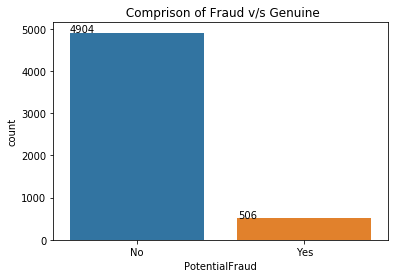

In [60]:
plt.title(' Comprison of Fraud v/s Genuine')
ax = sns.countplot(x = 'PotentialFraud', data=df_train_label)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

##### So this is an imbalanced dataset , where we see the prevalance of one class over the other. Hence to make a more robust model , one has to augment the marginal class , which we will do at the time of preprocessing.